In [1]:
import qiskit
display(qiskit.__version__)
display(qiskit.__qiskit_version__)

'0.25.2'

{'qiskit-terra': '0.25.2', 'qiskit': '0.44.2', 'qiskit-aer': '0.12.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
import numpy as np
import random
import time
from datetime import datetime
import mthree
from collections import Counter
import itertools


import pandas as pd
heading_properties = [('font-size', '15px')]
cell_properties = [('font-size', '15px')]
dfstyle = [dict(selector="th", props=heading_properties),\
           dict(selector="td", props=cell_properties),
           dict(selector="caption",
           props=[("text-align", "center"),
                  ("font-size", "15px"),
                  ("color", 'black')])]


from qiskit import QuantumCircuit
from qiskit import schedule
from qiskit import pulse
from qiskit.circuit import Gate
from qiskit.circuit.library import U3Gate, CZGate, PhaseGate
from qiskit.compiler import transpile
from qiskit_aer.noise import *
from qiskit_aer import AerSimulator
from qiskit.visualization.pulse_v2 import draw, IQXDebugging, IQXStandard, IQXSimple



import sys, importlib
# sys.path.append("/usr/people/raamu/jader/MEGA/classes")
#sys.path.append("/Users/jaderps/MEGA/classes")
sys.path.append("/Users/tanmoypandit/Dropbox/Tanmoy-Jader/Classes")


from kik_mitigation_v3 import *
# from splitter_v1 import *
from pretty_result_v1 import *
from jlib_v1 import *


In [3]:
# hub='ibm-q'
# group='open'
# project='main'
hub = 'ibm-q-research'
group = 'jerusalem-1'
project = 'main'

backend_name = 'ibm_nairobi'


# ------------------------------------------------------------------------------
# from qiskit_ibm_provider import IBMProvider 
# provider = IBMProvider()
# hgp = f"{hub}/{group}/{project}"
# backend = provider.get_backend(backend_name, instance=hgp)


from qiskit import IBMQ
IBMQ.load_account() 
provider = IBMQ.get_provider(hub=hub, group=group, project=project)
backend = provider.get_backend(backend_name)
# ------------------------------------------------------------------------------


backend_config = backend.configuration()
backend_defaults = backend.defaults()
backend_props = backend.properties()

# backend_config.basis_gates
dt = backend_config.dt

dt

/var/folders/v4/99ts0l0n3nn11xzhtf5d51dw0000gn/T/ipykernel_3155/3008469674.py:19: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


2.2222222222222221e-10

In [10]:
import numpy as np
test=QuantumCircuit(2)
test.cnot(0,1)
test.rx(1,0)

test = transpile(test, backend)

inst=Kik_pg(test,backend)

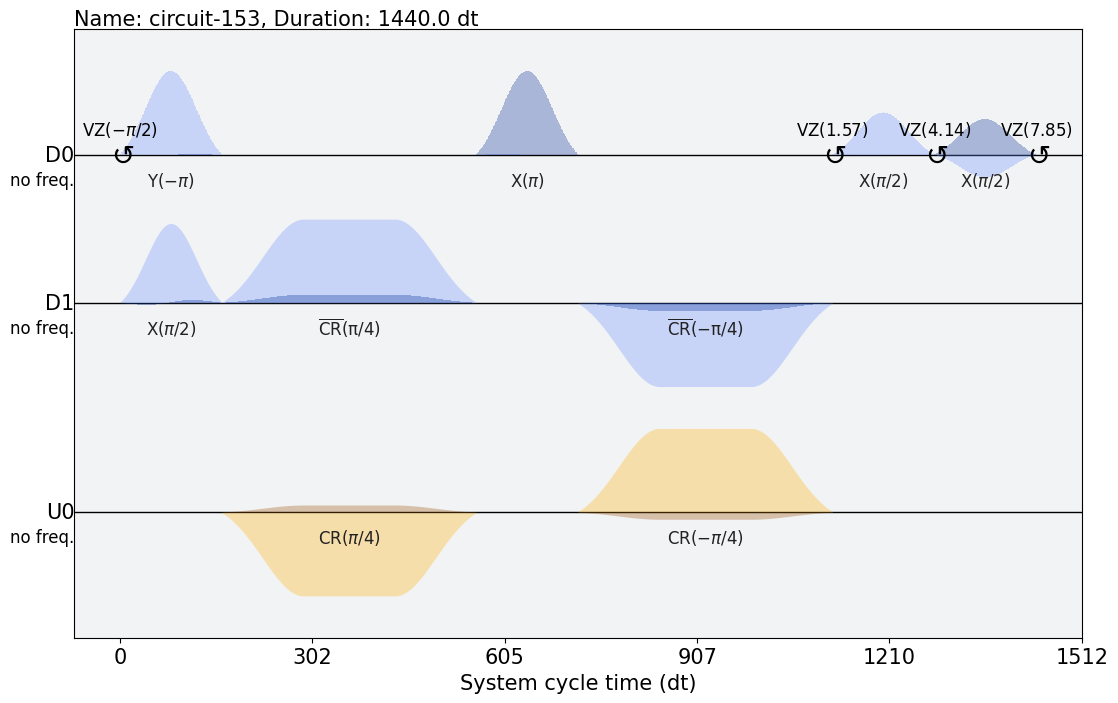

In [11]:
schedule(inst.kkik(0), backend).draw()

In [4]:
def rand(i):
    tab = [[0, 0, 0], 
           [-np.pi, np.pi, 0],
           [np.pi, np.pi/2, np.pi/2],
           [0, np.pi/2, np.pi/2]
          ]
    return tab[i]
    
def empty_rc(t):
    
    i0,i1,i2,i3 = [random.randint(0, 3) for _ in range(4)]
    
    qc = QuantumCircuit(4,2)
    qc.rx(1,0)
    qc.cnot(0,1)
    #
    qc.barrier()
    #
    if i0 in [0,3] and i1 in [0,3] and i2 in [0,3] and i3 in [0,3]:
        qc.delay(160)
    qc.u(*rand(i0),0)
    qc.u(*rand(i1),1)
    qc.u(*rand(i2),2)
    qc.u(*rand(i3),3)
    #
    qc.barrier()
    #
    qc.delay(t*(80+160+160+160+80)+2*160)
    #
    qc.barrier()
    #
    if i0 in [0,3] and i1 in [0,3] and i2 in [0,3] and i3 in [0,3]:
        qc.delay(160)
    qc.u(*rand(i0),0)
    qc.u(*rand(i1),1)
    qc.u(*rand(i2),2)
    qc.u(*rand(i3),3)
    #
    qc.barrier()
    #
    qc.cnot(0,1)
    qc.rx(1,0)
    qc.measure([0,1],[0,1])
    qc = transpile(qc, backend,optimization_level=1) #, scheduling_method="asap")
    return qc

def empty_rc_kkik(n,t):
    def k_():
        return Kik_pg(empty_rc(t), backend).k().remove_final_measurements(inplace=False)
    def ki_(): 
        return  Kik_pg(empty_rc(t), backend).ki().remove_final_measurements(inplace=False)
    #
    qc_ = QuantumCircuit(7,2)
    if n==0:
        qc_ = qc_.compose(k_())
        # qc_.barrier()
    elif n==1:
        qc_.barrier()
        qc_ = qc_.compose(k_())
        qc_.barrier()
        qc_ = qc_.compose(ki_())
        qc_.barrier()
        qc_ = qc_.compose(k_())
        # qc_.barrier()
    elif n==2:
        qc_.barrier()
        qc_ = qc_.compose(k_())
        qc_.barrier()
        qc_ = qc_.compose(ki_())
        qc_.barrier()
        qc_ = qc_.compose(k_())
        qc_.barrier()    
        qc_ = qc_.compose(ki_())
        qc_.barrier()
        qc_ = qc_.compose(k_())
        # qc_.barrier()

    elif n==3:
        qc_.barrier()
        qc_ = qc_.compose(k_())
        qc_.barrier()
        qc_ = qc_.compose(ki_())
        qc_.barrier()
        qc_ = qc_.compose(k_())
        qc_.barrier()    
        qc_ = qc_.compose(ki_())
        qc_.barrier()
        qc_ = qc_.compose(k_())
        qc_.barrier()    
        qc_ = qc_.compose(ki_())
        qc_.barrier()
        qc_ = qc_.compose(k_())
    elif n==4:
        qc_.barrier()
        qc_ = qc_.compose(k_())
        qc_.barrier()
        qc_ = qc_.compose(ki_())
        qc_.barrier()
        qc_ = qc_.compose(k_())
        qc_.barrier()    
        qc_ = qc_.compose(ki_())
        qc_.barrier()
        qc_ = qc_.compose(k_())
        qc_.barrier()    
        qc_ = qc_.compose(ki_())
        qc_.barrier()
        qc_ = qc_.compose(k_())   
        qc_.barrier()    
        qc_ = qc_.compose(ki_())
        qc_.barrier()
        qc_ = qc_.compose(k_())   
    qc_.measure([0,1],[0,1])    
    return qc_
#empty_rc_kkik(0,0).draw()
#empty_rc(0).draw()

In [7]:
 empty_rc_kkik(1,0).draw('mpl',idle_wires=False);

In [5]:
display(schedule(empty_rc_kkik(0,20).remove_final_measurements(inplace=False), backend).duration)
display(schedule(empty_rc_kkik(1,20).remove_final_measurements(inplace=False), backend).duration)
display(schedule(empty_rc_kkik(2,20).remove_final_measurements(inplace=False), backend).duration)
display(schedule(empty_rc_kkik(3,20).remove_final_measurements(inplace=False), backend).duration)
display(schedule(empty_rc_kkik(4,20).remove_final_measurements(inplace=False), backend).duration)

16320

48960

81600

114240

146880

In [6]:
display(schedule(empty_rc_kkik(0,20).remove_final_measurements(inplace=False), backend).duration * 3,
        schedule(empty_rc_kkik(0,20).remove_final_measurements(inplace=False), backend).duration * 5)

48960

81600

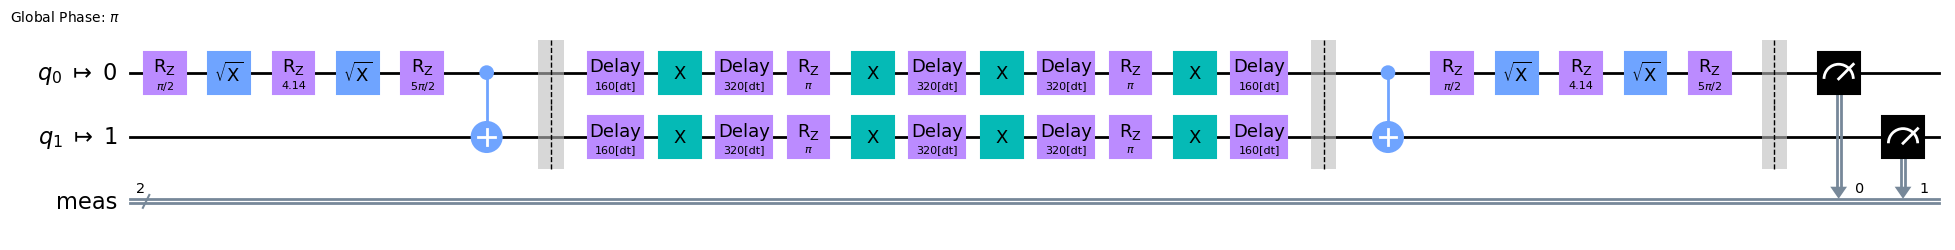

In [14]:
circuit_xy4(2).draw('mpl',idle_wires=False, fold=-1)

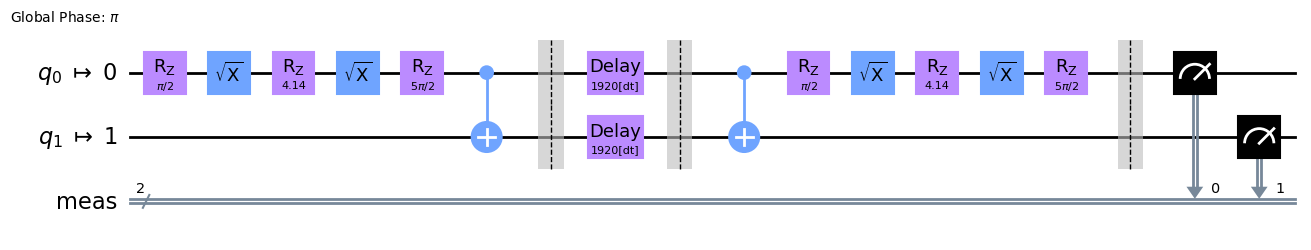

In [15]:
empty(2).draw('mpl',idle_wires=False, fold=-1)

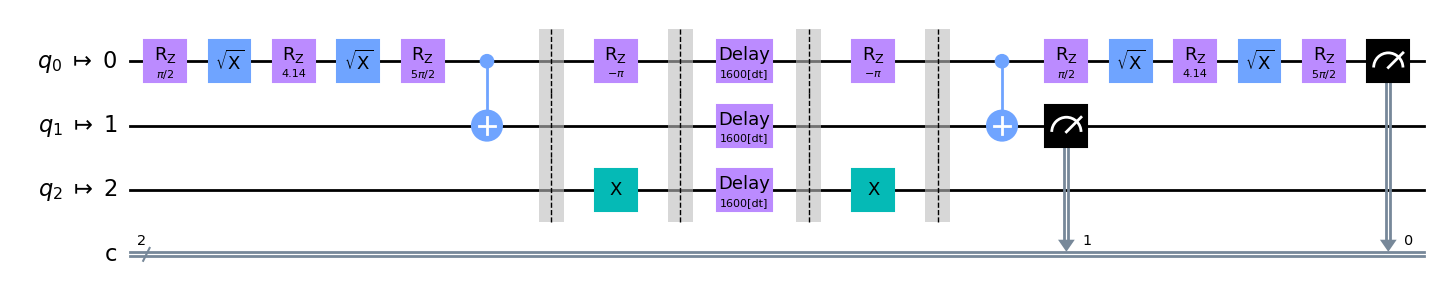

In [16]:
empty_rc(2).draw('mpl',idle_wires=False, fold=-1)

In [5]:
from qiskit.circuit import Delay

def empty(t):
    qc = QuantumCircuit(2)
    qc.rx(1,0)
    qc.cnot(0,1)
    qc.barrier()
    qc.delay(t*(2*80+3*160)+4*160)
    qc.barrier()
    qc.cnot(0,1)
    qc.rx(1,0)
    qc.measure_all()
    qc = transpile(qc, backend,optimization_level=0) #, scheduling_method="asap")
    return qc

def circuit_xy4(t):
    qc = QuantumCircuit(2)
    qc.rx(1,0)
    qc.cnot(0,1)
    qc.barrier()
    qc.delay(t*80)
    qc.x(0)
    qc.x(1)
    qc.delay(t*160)
    qc.y(0)
    qc.y(1)
    qc.delay(t*160)
    qc.x(0)
    qc.x(1)
    qc.delay(t*160)
    qc.y(0)
    qc.y(1)
    qc.delay(t*80)
    qc.barrier()
    qc.cnot(0,1)
    qc.rx(1,0)
    qc.measure_all()
    qc = transpile(qc, backend,optimization_level=0) #, scheduling_method="asap")
    return qc


In [8]:
t = [0,2,4,8][3]
display(-3520+schedule(empty(t).remove_final_measurements(inplace=False), backend).duration)
display(-3520+schedule(circuit_xy4(t).remove_final_measurements(inplace=False), backend).duration)
display(-3520+schedule(empty_rc(t).remove_final_measurements(inplace=False), backend).duration)

5120

5120

5120

In [6]:
%%time 

def initial_dep(d):
    qc = QuantumCircuit(2)
    qc.rz(list(itertools.product([1,-1], repeat=2))[d][0]*np.pi/2, [0])
    qc.rz(list(itertools.product([1,-1], repeat=2))[d][1]*np.pi/2, [1])
    qc.barrier([0,1])
    qc_t = transpile(qc, backend, optimization_level=0)
    return qc_t


batches_num = 3

trange = [2,4,8]

circuit_list = []
circuit_list.extend([initial_dep(d).compose(Kik_pg(empty(t), backend).kkik(n)) for t in trange for d in range(4) for n in range(5)])
circuit_list.extend([initial_dep(d).compose(empty_rc_kkik(n,t)) for t in trange for d in range(4) for n in range(5) for _ in range(batches_num)])
circuit_list.extend([initial_dep(d).compose(Kik_pg(circuit_xy4(t), backend).kkik(n)) for t in trange for d in range(4) for n in range(5)])

len(circuit_list)



KeyboardInterrupt: 

In [ ]:
def initial_dep(d):
    qc = QuantumCircuit(2)
    qc.rz(list(itertools.product([1,-1], repeat=2))[d][0]*np.pi/2, [0])
    qc.rz(list(itertools.product([1,-1], repeat=2))[d][1]*np.pi/2, [1])
    qc.barrier([0,1])
    qc_t = transpile(qc, backend, optimization_level=0)
    return qc_t


batches_num = 3

trange = [2,4,8]

circuit_list = []
circuit_list.extend([initial_dep(d).compose(Kik_pg(empty(t), backend).kik(n)) for t in trange for d in range(4) for n in range(2)])
circuit_list.extend([initial_dep(d).compose(Kik_pg(circuit_xy4(t), backend).kik(n)) for t in trange for d in range(4) for n in range(2)])
circuit_list.extend([initial_dep(d).compose(Kik_pg(empty(t), backend).kkik(n)) for t in trange for d in range(4) for n in range(5)])
circuit_list.extend([initial_dep(d).compose(empty_rc_kkik(n,t)) for t in trange for d in range(4) for n in range(5) for _ in range(batches_num)])
circuit_list.extend([initial_dep(d).compose(Kik_pg(circuit_xy4(t), backend).kkik(n)) for t in trange for d in range(4) for n in range(5)])

len(circuit_list)


In [18]:
t=8
n=1
new=QuantumCircuit(2,2)
new.h(0)
new.cnot(0,1)
new.measure([0,1],[0,1])
Kik_pg(transpile(new,backend), backend).kik(n).draw(idle_wires=False, fold=-1)

global phase: π/4
     ┌────────────┐┌────────────┐┌────────────┐┌─────────────┐ ░ ┌─────────────┐  ┌────────────┐  ┌────────────┐┌────────────┐┌─┐
q_0: ┤ rz('F', 0) ├┤ sx('F', 1) ├┤ rz('F', 2) ├┤0            ├─░─┤0            ├──┤ rz('B', 2) ├──┤ sx('B', 1) ├┤ rz('B', 0) ├┤M├
     └────────────┘└────────────┘└────────────┘│  cx('F', 3) │ ░ │  cx('B', 3) │┌─┴────────────┴─┐└────┬─┬─────┘└────────────┘└╥┘
q_1: ──────────────────────────────────────────┤1            ├─░─┤1            ├┤ Delay(160[dt]) ├─────┤M├─────────────────────╫─
                                               └─────────────┘ ░ └─────────────┘└────────────────┘     └╥┘                     ║ 
c: 2/═══════════════════════════════════════════════════════════════════════════════════════════════════╩══════════════════════╩═
                                                                                                        1                      0

In [38]:
glist = [0, 3*4*5, 3*4*5+3*4*5*3, 3*4*5+3*4*5*3+3*4*5]
print(glist)


[0, 60, 240, 300]


In [11]:
for n in range(5):
 print(n)

0
1
2
3
4


In [21]:
circ_num = len(circuit_list)
init_state_num = 1
shots_num = 32000
dep_num = 2**2
kik_num = 2
shots_cal_num = 32000

batches_num = 3

trange = [2,4,8]

In [ ]:
trange = [8,10,16]

In [22]:
short_description = input("Description:")
file_name = f'{backend_name}_'+ datetime.now().strftime('%d_%m_%Y_%H_%M_%S') + ".py"
# cals_file = "mthree_cal_" + f'{backend_name}_' + datetime.now().strftime('%d_%m_%Y_%H_%M_%S') + ".py.json"
print(f'# {time.ctime()}', file=open(file_name, "a"))
print(f'# {short_description}',file=open(file_name, "a"))
# print(f'qubits_list_cal = {qubits_list_cal}', file=open(file_name, "a"))
print(f'backend_name = "{backend_name}"', file=open(file_name, "a"))
print(f'shots_num = {shots_num}', file=open(file_name, "a"))
print(f'shots_cal_num = {shots_cal_num}', file=open(file_name, "a"))
print(f'init_state_num = {init_state_num}', file=open(file_name, "a"))
print(f'dep_num = {dep_num}', file=open(file_name, "a"))
print(f'kik_num = {kik_num}', file=open(file_name, "a"))
print(f'circ_num = {circ_num}', file=open(file_name, "a"))
print(f"hub = '{hub}'", file=open(file_name, "a"))
print(f"group = '{group}'", file=open(file_name, "a"))
print(f"project = '{project}'", file=open(file_name, "a"))
# print(f"cals_file = '{cals_file}'", file=open(file_name, "a"))

job = backend.run(circuit_list, shots = shots_num)
print(job.job_id()) 
time.ctime() 
print(f'job_id = "{job.job_id()}"', file=open(file_name, "a"))

Description: DD+KIK+higherordermitigation


cn2ze0gvayrg008ehysg


In [7]:
# display(circuit_list[0].draw(fold=-1))
# display(circuit_list[36].draw(fold=-1))
# display(circuit_list[36+1].draw(fold=-1))
# display(circuit_list[216].draw(fold=-1))

In [8]:
# display(schedule(circuit_list[0+1], backend).duration,
# schedule(circuit_list[36+5], backend).duration,
# schedule(circuit_list[216+1], backend).duration)

In [19]:
circ_num = len(circuit_list)
init_state_num = 1
shots_num = 32000
dep_num = 2**2
kik_num = 5
shots_cal_num = 32000

batches_num = 3

trange = [2,4,8]

# time_0 = schedule(transpile(circuit_xy4(8).remove_final_measurements(inplace=False), backend), backend).duration
# time_0 = time_0*dt
# time_0 = time_0*shots_num
# time_0*circ_num

In [19]:
short_description = input("Description:")
file_name = f'{backend_name}_'+ datetime.now().strftime('%d_%m_%Y_%H_%M_%S') + ".py"
# cals_file = "mthree_cal_" + f'{backend_name}_' + datetime.now().strftime('%d_%m_%Y_%H_%M_%S') + ".py.json"
print(f'# {time.ctime()}', file=open(file_name, "a"))
print(f'# {short_description}',file=open(file_name, "a"))
# print(f'qubits_list_cal = {qubits_list_cal}', file=open(file_name, "a"))
print(f'backend_name = "{backend_name}"', file=open(file_name, "a"))
print(f'shots_num = {shots_num}', file=open(file_name, "a"))
print(f'shots_cal_num = {shots_cal_num}', file=open(file_name, "a"))
print(f'init_state_num = {init_state_num}', file=open(file_name, "a"))
print(f'dep_num = {dep_num}', file=open(file_name, "a"))
print(f'kik_num = {kik_num}', file=open(file_name, "a"))
print(f'circ_num = {circ_num}', file=open(file_name, "a"))
print(f"hub = '{hub}'", file=open(file_name, "a"))
print(f"group = '{group}'", file=open(file_name, "a"))
print(f"project = '{project}'", file=open(file_name, "a"))
# print(f"cals_file = '{cals_file}'", file=open(file_name, "a"))

job = backend.run(circuit_list, shots = shots_num)
print(job.job_id()) 
time.ctime() 
print(f'job_id = "{job.job_id()}"', file=open(file_name, "a"))


Description: DD+KIK+norderMit


cn1q5q6daqbg008sprcg


In [92]:
######################################################################

# mit.cals_from_system(qubits_list_cal, shots = shots_cal_num, cals_file=cals_file)

# results

In [23]:
#from ibm_nairobi_10_10_2023_11_32_00 import * 
from ibm_nairobi_04_11_2023_13_16_49 import*

# hgp = f"{hub}/{group}/{project}"
# backend = provider.get_backend(backend_name, instance=hgp)
provider = IBMQ.get_provider(hub=hub, group=group, project=project)
backend = provider.get_backend(backend_name)


job = provider.backend.retrieve_job(globals()['job_id'])
mit = mthree.M3Mitigation()
mit.cals_from_file(globals()['cals_file'])

In [16]:
0, 3*4*3, 5*3*4*3, 3*4*3

(0, 36, 180, 36)

In [19]:
circ_num

252

In [33]:
sl = state_label(len(qubits_list_cal))
sl

['00', '01', '10', '11']

In [28]:
kik_num=4

In [41]:
sl = state_label(len(qubits_list_cal))

counts_raw = job.result().get_counts()
counts_cal = mit.apply_correction(counts_raw, 
                                  qubits_list_cal,
                                  return_mitigation_overhead=True)

def data_counts(cal): 
    num = circ_num
    if cal=='raw': 
        return [Counter({**dict.fromkeys(sl, 0),**counts_raw[j]}) for j in range(num)]
    elif cal=='cal': 
        return [Counter({**dict.fromkeys(sl, 0),**counts_cal[j]}) for j in range(num)]    
    else: 
        raise SyntaxError('Error') 
        sys.exit(1) 

def prob(g, t, n, cal, s=0):
    def prob2(d, g, t, n, cal):
        glist = [0, 3*4*5, 3*4*5+3*4*5*3, 3*4*5+3*4*5*3+3*4*5]
        if g==0:
            data = [data_counts(cal)[glist[g]:glist[g+1]][n::(kik_num+1)][t*4:(1+t)*4][d]]
        elif g==1:
            data = data_counts(cal)[glist[g]:glist[g+1]][batches_num*n + t*batches_num * dep_num * (kik_num+1)+batches_num*3*d:
                                              batches_num*n + t*batches_num * dep_num * (kik_num+1)+batches_num*3*d+batches_num]
        elif g==2:
            data = [data_counts(cal)[glist[g]:glist[g+1]][n::(kik_num+1)][t*4:(1+t)*4][d]]
        return data
    delta = len(prob2(0, g, t, n, cal))
    data_ = np.array([[prob2(d, g, t, n, cal)[i][sl[s]] for i in range(delta)] for d in range(4)]).flatten()
    if cal=='raw':
        p_list = np.array(data_)/shots_num
    elif cal=='cal':
        p_list = np.array(data_)
    else:
        raise SyntaxError('Error')  
    p_avg = np.mean(p_list)    
    p_error = (1/len(data_))*np.sqrt(np.sum(p_list*(1-p_list)/shots_num))    
    return [p_avg, p_error]



display(prob(0, 1, 4, 'raw'))
display(prob(1, 1, 3, 'raw'))
display(prob(2, 1, 0, 'raw'))
display(prob(2, 1, 1, 'raw'))
display(prob(2, 1, 1, 'raw'))


[0.647359375, 0.0013352344684222474]

[0.41902343749999993, 0.0007547414051616835]

[0.303296875, 0.0012838034917129928]

[0.2877109375, 0.0012646401611999937]

[0.2877109375, 0.0012646401611999937]

In [33]:
3*4*5 + 5*3*4*5 + 3*4*5

420

In [34]:
3*4*5 + 5*3*4*5

360

In [35]:
3*4*5

60

In [42]:
t = 0
cal = 'cal'
# [Pretty_result(prob(0, t, n, cal)).pretty_form() for n in range(kik_num+1)]
display([Pretty_result(*list(prob(0, t, n, cal))).pretty_form() for n in range(kik_num+1)])
display([Pretty_result(*list(prob(1, t, n, cal))).pretty_form() for n in range(kik_num+1)])
display([Pretty_result(*list(prob(2, t, n, cal))).pretty_form() for n in range(kik_num+1)])

['0.306(1)', '0.416(1)', '0.588(1)', '0.733(1)', '0.788(1)']

['0.4018(7)', '0.3767(8)', '0.4208(7)', '0.4915(7)', '0.3930(8)']

['0.286(1)', '0.275(1)', '0.270(1)', '0.303(1)', '0.365(1)']

In [43]:
t = 1
cal = 'cal'
display([Pretty_result(*list(kik([prob(0, t, n, cal) for n in range(kik_num+1)], m) )).pretty_form() for m in range(kik_num+1)])
display([Pretty_result(*list(kik([prob(1, t, n, cal) for n in range(kik_num+1)], m) )).pretty_form() for m in range(kik_num+1)])
display([Pretty_result(*list(kik([prob(2, t, n, cal) for n in range(kik_num+1)], m) )).pretty_form() for m in range(kik_num+1)])

['0.324(1)', '0.216(2)', '0.213(3)', '0.267(4)', '0.321(7)']

['0.3743(7)', '0.374(1)', '0.390(2)', '0.419(3)', '0.451(4)']

['0.283(1)', '0.291(2)', '0.301(3)', '0.298(4)', '0.293(7)']

In [44]:
t = 2
display([Pretty_result(*list(kik([prob(0, t, n, cal) for n in range(kik_num+1)], m) )).pretty_form() for m in range(kik_num+1)])
display([Pretty_result(*list(kik([prob(1, t, n, cal) for n in range(kik_num+1)], m) )).pretty_form() for m in range(kik_num+1)])
display([Pretty_result(*list(kik([prob(2, t, n, cal) for n in range(kik_num+1)], m) )).pretty_form() for m in range(kik_num+1)])

['0.380(1)', '0.196(2)', '0.048(3)', '-0.034(4)', '-0.024(7)']

['0.4343(8)', '0.427(1)', '0.447(2)', '0.505(3)', '0.604(4)']

['0.284(1)', '0.289(2)', '0.302(3)', '0.307(4)', '0.306(7)']

In [37]:
# t = 3
# display([Pretty_result(*list(kik([prob(0, t, n, cal) for n in range(kik_num+1)], m) )).pretty_form() for m in range(kik_num+1)])
# display([Pretty_result(*list(kik([prob(1, t, n, cal) for n in range(kik_num+1)], m) )).pretty_form() for m in range(kik_num+1)])
# display([Pretty_result(*list(kik([prob(2, t, n, cal) for n in range(kik_num+1)], m) )).pretty_form() for m in range(kik_num+1)])

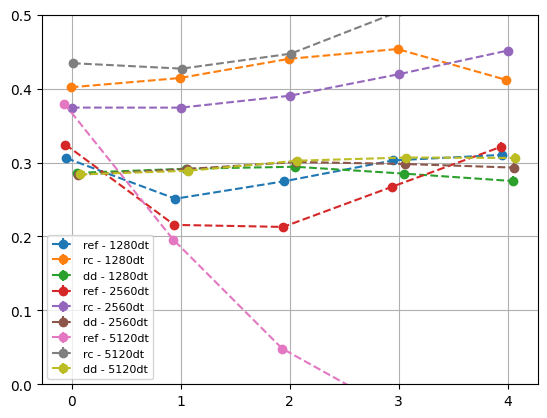

In [47]:

def ydata(g, t, cal='cal'):
    y = np.array([kik([prob(g, t, n, cal) for n in range(kik_num+1)], m)[0]  for m in range(kik_num+1)])
    yerr = np.array([kik([prob(g, t, n, cal) for n in range(kik_num+1)], m)[1]  for m in range(kik_num+1)])
    return [y, yerr]


import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

x = ['0', '1', '2','3','4']

# y1, y2 = np.random.randn(2, len(x))
# yerr1, yerr2 = np.random.rand(2, len(x))*4+0.3

fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.05, 0.0) + ax.transData
trans2 = Affine2D().translate(-0.01, 0.0) + ax.transData
trans3 = Affine2D().translate(+0.05, 0.0) + ax.transData
trans4 = Affine2D().translate(-0.06, 0.0) + ax.transData
trans5 = Affine2D().translate(0.00, 0.0) + ax.transData
trans6 = Affine2D().translate(+0.06, 0.0) + ax.transData
trans7 = Affine2D().translate(-0.07, 0.0) + ax.transData
trans8 = Affine2D().translate(+0.01, 0.0) + ax.transData
trans9 = Affine2D().translate(+0.07, 0.0) + ax.transData

er1 = ax.errorbar(x, ydata(0, 0)[0], yerr=ydata(0, 0)[1], marker="o", linestyle="--", transform=trans1)
er2 = ax.errorbar(x, ydata(1, 0)[0], yerr=ydata(1, 0)[1], marker="o", linestyle="--", transform=trans2)
er3 = ax.errorbar(x, ydata(2, 0)[0], yerr=ydata(2, 0)[1], marker="o", linestyle="--", transform=trans3)
er4 = ax.errorbar(x, ydata(0, 1)[0], yerr=ydata(0, 1)[1], marker="o", linestyle="--", transform=trans4)
er5 = ax.errorbar(x, ydata(1, 1)[0], yerr=ydata(1, 1)[1], marker="o", linestyle="--", transform=trans5)
er6 = ax.errorbar(x, ydata(2, 1)[0], yerr=ydata(2, 1)[1], marker="o", linestyle="--", transform=trans6)
er7 = ax.errorbar(x, ydata(0, 2)[0], yerr=ydata(0, 2)[1], marker="o", linestyle="--", transform=trans7)
er8 = ax.errorbar(x, ydata(1, 2)[0], yerr=ydata(1, 2)[1], marker="o", linestyle="--", transform=trans8)
er9 = ax.errorbar(x, ydata(2, 2)[0], yerr=ydata(2, 2)[1], marker="o", linestyle="--", transform=trans9)

plt.legend(['ref - 1280dt', 'rc - 1280dt', 'dd - 1280dt',
           'ref - 2560dt', 'rc - 2560dt', 'dd - 2560dt',
           'ref - 5120dt', 'rc - 5120dt', 'dd - 5120dt']
           , prop={'size': 8.0}, ncol=1)#, loc='lower right')  # loc = (1.6,-.5) # 'lower right'
plt.axis(ymin=0, ymax=0.5)
plt.grid()

plt.savefig('plot_1.pdf', dpi=300, bbox_inches='tight')
plt.show()


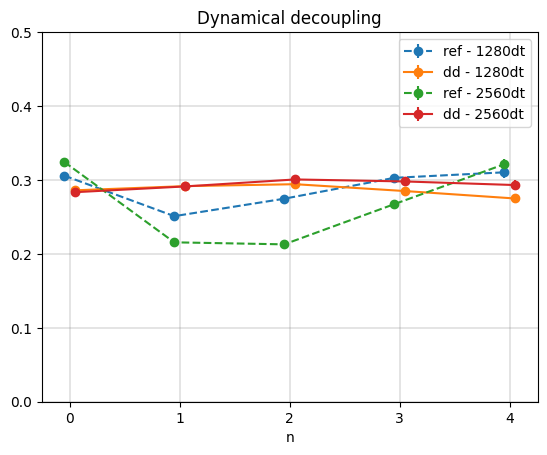

In [49]:
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

x = ['0', '1', '2','3','4']
# y1, y2 = np.random.randn(2, len(x))
# yerr1, yerr2 = np.random.rand(2, len(x))*4+0.3

fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.05, 0.0) + ax.transData
trans2 = Affine2D().translate(0.0, 0.0) + ax.transData
trans3 = Affine2D().translate(+0.05, 0.0) + ax.transData
trans4 = Affine2D().translate(-0.05, 0.0) + ax.transData
trans5 = Affine2D().translate(0.0, 0.0) + ax.transData
trans6 = Affine2D().translate(+0.05, 0.0) + ax.transData
trans7 = Affine2D().translate(-0.05, 0.0) + ax.transData
trans8 = Affine2D().translate(0.0, 0.0) + ax.transData
trans9 = Affine2D().translate(+0.05, 0.0) + ax.transData

er1 = ax.errorbar(x, ydata(0, 0)[0], yerr=ydata(0, 0)[1], marker="o", linestyle="--", transform=trans1)
# er2 = ax.errorbar(x, ydata(1, 0)[0], yerr=ydata(1, 0)[1], marker="o", linestyle="--", transform=trans2)
er3 = ax.errorbar(x, ydata(2, 0)[0], yerr=ydata(2, 0)[1], marker="o", linestyle="-", transform=trans3)
er4 = ax.errorbar(x, ydata(0, 1)[0], yerr=ydata(0, 1)[1], marker="o", linestyle="--", transform=trans4)
# er5 = ax.errorbar(x, ydata(1, 1)[0], yerr=ydata(1, 1)[1], marker="o", linestyle="--", transform=trans5)
er6 = ax.errorbar(x, ydata(2, 1)[0], yerr=ydata(2, 1)[1], marker="o", linestyle="-", transform=trans6)
# er7 = ax.errorbar(x, ydata(0, 2)[0], yerr=ydata(0, 2)[1], marker="o", linestyle="--", transform=trans7)
# er8 = ax.errorbar(x, ydata(1, 2)[0], yerr=ydata(1, 2)[1], marker="o", linestyle="--", transform=trans8)
# er9 = ax.errorbar(x, ydata(2, 2)[0], yerr=ydata(2, 2)[1], marker="o", linestyle="--", transform=trans9)

plt.legend(['ref - 1280dt' 
            # ,'rc - 1280dt'
            ,'dd - 1280dt'
            ,'ref - 2560dt' 
            # ,'rc - 2560dt' 
            ,'dd - 2560dt'
            # ,'ref - 5120dt' 
            # ,'rc - 5120dt'
            #,'dd - 5120dt'
           ]
          )# , prop={'size': 8.0}, ncol=1, loc='lower right')  # loc = (1.6,-.5) # 'lower right'
plt.grid(color='tab:grey', linestyle='-', linewidth=0.3)
plt.tick_params(axis='both', which='minor', labelsize=1)
plt.xlabel('n')#, fontsize=8)
plt.axis(ymin=0, ymax=0.5)

plt.title("Dynamical decoupling")
plt.savefig('plot_3.pdf', dpi=300, bbox_inches='tight')
plt.show()

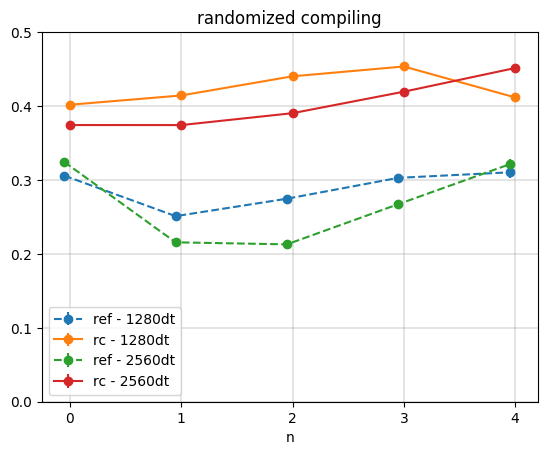

In [50]:
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

x = ['0', '1', '2','3','4']
# y1, y2 = np.random.randn(2, len(x))
# yerr1, yerr2 = np.random.rand(2, len(x))*4+0.3

fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.05, 0.0) + ax.transData
trans2 = Affine2D().translate(0.0, 0.0) + ax.transData
trans3 = Affine2D().translate(+0.05, 0.0) + ax.transData
trans4 = Affine2D().translate(-0.05, 0.0) + ax.transData
trans5 = Affine2D().translate(0.0, 0.0) + ax.transData
trans6 = Affine2D().translate(+0.05, 0.0) + ax.transData
trans7 = Affine2D().translate(-0.05, 0.0) + ax.transData
trans8 = Affine2D().translate(0.0, 0.0) + ax.transData
trans9 = Affine2D().translate(+0.05, 0.0) + ax.transData

er1 = ax.errorbar(x, ydata(0, 0)[0], yerr=ydata(0, 0)[1], marker="o", linestyle="--", transform=trans1)
er2 = ax.errorbar(x, ydata(1, 0)[0], yerr=ydata(1, 0)[1], marker="o", linestyle="-", transform=trans2)
# er3 = ax.errorbar(x, ydata(2, 0)[0], yerr=ydata(2, 0)[1], marker="o", linestyle="--", transform=trans3)
er4 = ax.errorbar(x, ydata(0, 1)[0], yerr=ydata(0, 1)[1], marker="o", linestyle="--", transform=trans4)
er5 = ax.errorbar(x, ydata(1, 1)[0], yerr=ydata(1, 1)[1], marker="o", linestyle="-", transform=trans5)
# er6 = ax.errorbar(x, ydata(2, 1)[0], yerr=ydata(2, 1)[1], marker="o", linestyle="--", transform=trans6)
# er7 = ax.errorbar(x, ydata(0, 2)[0], yerr=ydata(0, 2)[1], marker="o", linestyle="--", transform=trans7)
# er8 = ax.errorbar(x, ydata(1, 2)[0], yerr=ydata(1, 2)[1], marker="o", linestyle="--", transform=trans8)
# er9 = ax.errorbar(x, ydata(2, 2)[0], yerr=ydata(2, 2)[1], marker="o", linestyle="--", transform=trans9)

plt.legend(['ref - 1280dt' 
            ,'rc - 1280dt'
            #,'dd - 1280dt'
            ,'ref - 2560dt' 
            ,'rc - 2560dt' 
            #,'dd - 2560dt'
            # ,'ref - 5120dt' 
            # ,'rc - 5120dt'
            #,'dd - 5120dt'
           ])#, prop={'size': 8.0}, ncol=1, loc='lower right')  # loc = (1.6,-.5) # 'lower right'
plt.grid(color='tab:grey', linestyle='-', linewidth=0.3)
plt.tick_params(axis='both', which='minor', labelsize=1)
plt.xlabel('n')#, fontsize=8)
plt.axis(ymin=0, ymax=0.5)

plt.title("randomized compiling")
plt.savefig('plot_2.pdf', dpi=300, bbox_inches='tight')
plt.show()